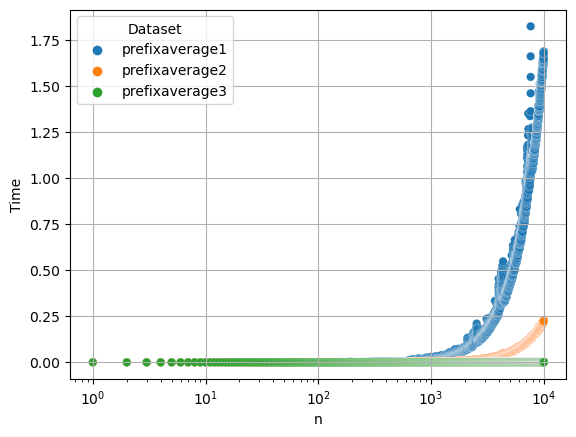

In [2]:
import time as t
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd


def prefixaverage1(S):
    n = len(S)
    A = [0] * n
    for j in range(n):
        total = 0
        for i in range(j+1):
            total += S[i]
        A[j] = total/(j+1)
    return A


def prefixaverage2(S):
    n = len(S)
    A = [0] * n
    for j in range(n):
        A[j] = sum(S[0:j+1])/(j+1)
    return A


def prefixaverage3(S):
    n = len(S)
    A = [0] * n
    total = 0
    for j in range(n):
        total += S[j]
        A[j] = total/(j+1)
    return A


a1_time = []
a2_time = []
a3_time = []
data = []

# n^2
a1 = []
for i in range(1, 10001):
    a1.append(i)
    start_time1 = t.time()
    prefixaverage1(a1)
    a1_time.append(t.time()-start_time1)

# n^2
a2 = []
for i in range(1, 10001):
    a2.append(i)
    start_time2 = t.time()
    prefixaverage2(a2)
    a2_time.append(t.time()-start_time2)

# n
a3 = []
for i in range(1, 10001):
    a3.append(i)
    start_time3 = t.time()
    prefixaverage3(a3)
    a3_time.append(t.time()-start_time3)


a1_df = pd.DataFrame(data, columns=['n', 'Time'])
a1_df['n'] = a1
a1_df['Time'] = a1_time

a2_df = pd.DataFrame(data, columns=['n', 'Time'])
a2_df['n'] = a2
a2_df['Time'] = a2_time

a3_df = pd.DataFrame(data, columns=['n', 'Time'])
a3_df['n'] = a3
a3_df['Time'] = a3_time

concat_df = pd.concat([a1_df.assign(Dataset='prefixaverage1'), a2_df.assign(Dataset='prefixaverage2'), a3_df.assign(Dataset='prefixaverage3')])

ax = plt.gca()
ax.grid(True)
sb.scatterplot(data=concat_df, x="n", y="Time", hue="Dataset", linewidth=0.1)
ax.set_xscale("log")
plt.show()
